In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import math
from sklearn.linear_model import LinearRegression #mô hình hồi quy tuyến tính
import statistics as sta

print('Completed import lib')

Completed import lib


In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
print('Completed import')

Completed import


# Xử lý data

In [7]:
# customer_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='customer info')
# items_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Items')
# customer_transactions = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Customer transactions')

customer_data = pd.read_excel('customers_data.xlsx',sheet_name='customer info')
items_data = pd.read_excel('customers_data.xlsx',sheet_name='Items')
customer_transactions = pd.read_excel('customers_data.xlsx',sheet_name='Customer transactions')

In [8]:
os.chdir('../DA_TEST_2/Traffic')

extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
traffic_data = pd.concat([pd.read_excel(f) for f in all_filenames ])
traffic_data

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
461,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
462,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
463,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
464,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [9]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 465
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  float64       
 2   uniquePageviews         17889 non-null  float64       
 3   pageviews               17889 non-null  float64       
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 978.3+ KB


In [10]:
customer_data

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [11]:
items_data

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0
...,...,...,...,...,...
17884,17885.0,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202.0,42.0
17885,17886.0,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463.0,131.0
17886,17887.0,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688.0,200.0
17887,17888.0,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157.0,63.0


In [12]:
customer_transactions

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store
...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store
25209,8361.0,769.0,13162.0,2020-02-04,In Store
25210,8362.0,769.0,8727.0,2020-11-18,In Store
25211,8362.0,769.0,13065.0,2020-05-11,In Store


In [13]:
sell = pd.merge(customer_transactions, items_data[['ItemID','Brand','SellPrice','CostPrice']], on='ItemID',how='left')
sell['month'] = pd.DatetimeIndex(sell['TransactionDate']).month
sell['year'] = pd.DatetimeIndex(sell['TransactionDate']).year
sell


,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,month,year
0,0.0,0.0,352.0,2020-03-21,In Store,"MouDd/fn,XEARhBp",735.0,426.0,3,2020
1,0.0,0.0,3433.0,2020-07-14,In Store,"muy(D#""d02`vwt_^",963.0,491.0,7,2020
2,0.0,0.0,11162.0,2020-08-09,In Store,Wem+H2Pk8Jfbb*[D,582.0,391.0,8,2020
3,0.0,0.0,13011.0,2020-12-07,In Store,ThcmX`v~{K~t{Jeh,339.0,135.0,12,2020
4,0.0,0.0,13885.0,2020-11-08,In Store,Ka53T<K8f.2M94Yd,1369.0,231.0,11,2020
...,...,...,...,...,...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store,"Ac8IJsKH,4xtY.Tk",1077.0,242.0,12,2020
25209,8361.0,769.0,13162.0,2020-02-04,In Store,"Ince!T,;eW/4o\eg",1140.0,253.0,2,2020
25210,8362.0,769.0,8727.0,2020-11-18,In Store,WaQqK)2JxI(=dac=,205.0,66.0,11,2020
25211,8362.0,769.0,13065.0,2020-05-11,In Store,"Uny~Y,~<rTC^J6py",1012.0,272.0,5,2020


# 1.	Website traffic có ảnh hưởng đến doanh thu không ?

### Lượng view và user sử dụng trong năm 2020

In [14]:
traffic_data['date'] = pd.to_datetime(traffic_data['Posted On (DD/MM/YYYY)']).dt.date
traffic_data_2 = traffic_data.groupby(['date'])[['users','uniquePageviews','pageviews','Brand','date']].sum()
traffic_data_2.reset_index(inplace=True)
traffic_data_2

,date,users,uniquePageviews,pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


Text(0.5, 1.0, 'Lượng view và user sử dụng trong năm 2020')

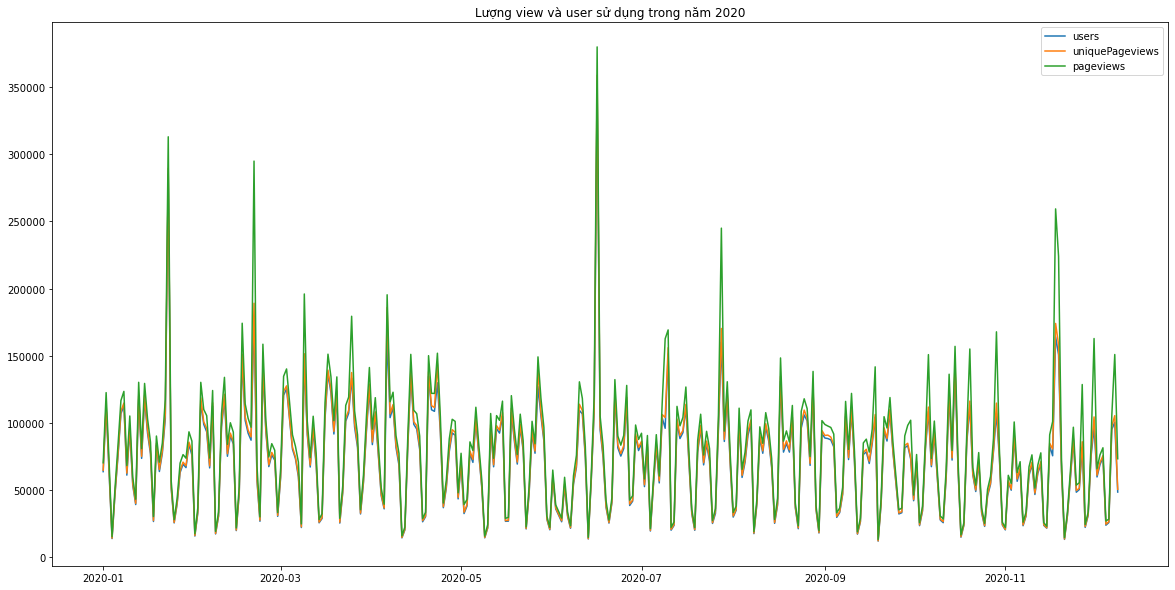

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('w')
xs = traffic_data_2['date']
y_users = traffic_data_2['users']
y_uniview = traffic_data_2['uniquePageviews']
y_pageview = traffic_data_2['pageviews']

plt.plot(xs,y_users, label='users')
plt.plot(xs,y_uniview, label='uniquePageviews')
plt.plot(xs,y_pageview, label='pageviews')


plt.title('Lượng view và user sử dụng trong năm 2020')
plt.legend()
plt.show()

### Doanh thu bán hàng online và bán hàng tại chỗ

In [16]:
revenus_year = sell.groupby('Channel')[['SellPrice']].sum()
revenus_year.loc['Column_Total']= revenus_year.sum(numeric_only=True, axis=0)
revenus_year.reset_index(inplace=True)
revenus_year['change%'] = (revenus_year['SellPrice']/int(revenus_year['SellPrice'].iloc[2:3]))*100
revenus_year

,Channel,SellPrice,change%
0,In Store,10222263.0,50.066875
1,Online,10194955.0,49.933125
2,Column_Total,20417218.0,100.000000


<AxesSubplot:xlabel='Channel', ylabel='change%'>

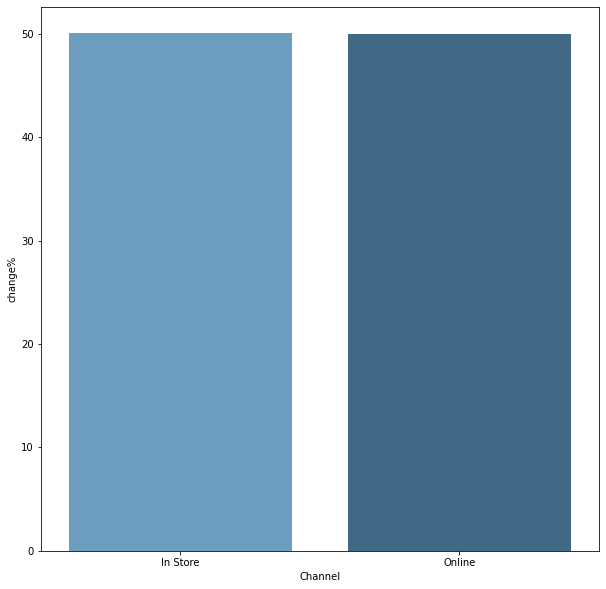

In [17]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('w')
sns.barplot(x='Channel', y='change%', data=revenus_year.loc[revenus_year['Channel'] != 'Column_Total'],palette='Blues_d')

Tại năm 2020 doanh thu từ bán hàng online chiếm 49.9% tổng doanh thu của nhãn hàng, cho thấy doanh thu từ bán hàng online có sự ảnh hưởng rất lớn đến doanh nghiệp

In [18]:
sell_month = sell.copy()
revenus_month = sell_month.groupby(['Channel','month'])[['SellPrice']].sum()
revenus_month.reset_index(inplace=True)
revenus_month

,Channel,month,SellPrice
0,In Store,1,832491.0
1,In Store,2,818208.0
2,In Store,3,847625.0
3,In Store,4,877582.0
4,In Store,5,839278.0
5,In Store,6,873757.0
6,In Store,7,851370.0
7,In Store,8,856549.0
8,In Store,9,874165.0
9,In Store,10,817780.0


<AxesSubplot:xlabel='month', ylabel='SellPrice'>

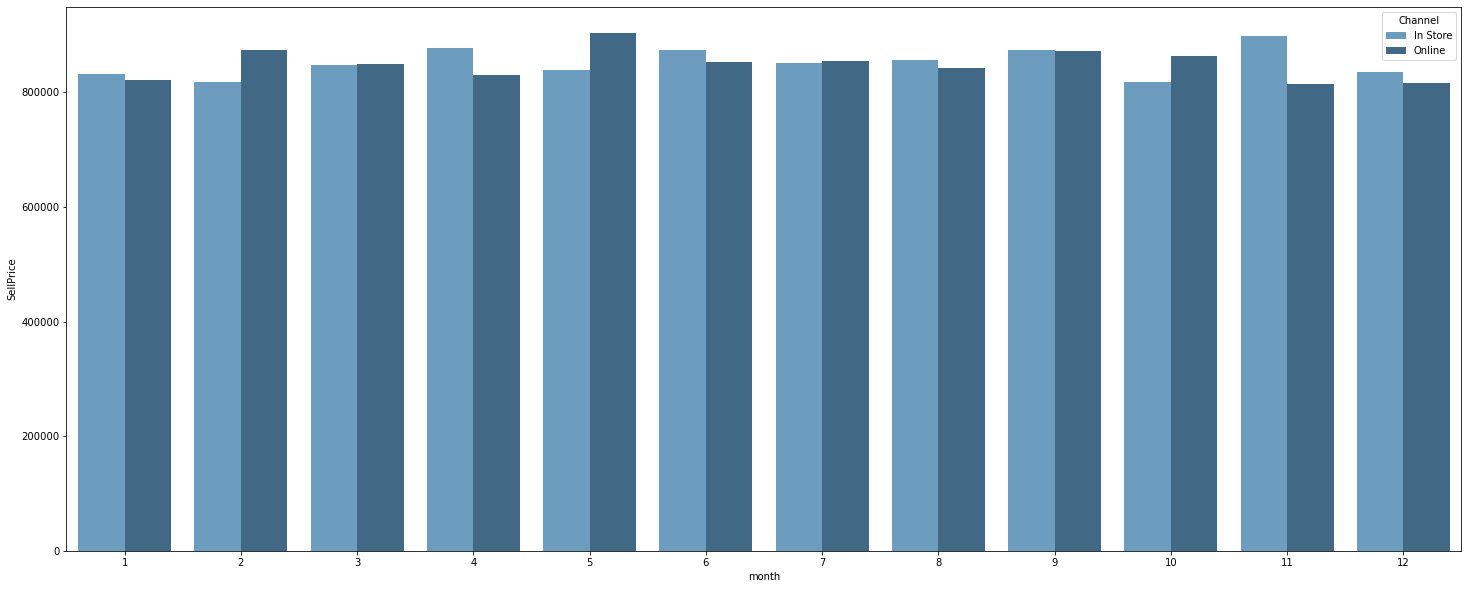

In [19]:
fig = plt.figure(figsize=(25,10))
fig.patch.set_facecolor('w')
sns.barplot(x='month', y='SellPrice', data=revenus_month,hue='Channel',palette='Blues_d')

Doanh thu trung bình từ bán hàng truyền thống cao hơn doanh thu từ bán hàng online vào thời gian nghỉ lễ cuối và đầu năm. Giai đoạn giữa năm doanh thu trung bình không chênh lệch quá nhiều.

# 2.	Sản phẩm nào mang lại pageviews và doanh thu

In [20]:
items_view = traffic_data.groupby(['Brand'])[['pageviews','uniquePageviews']].sum()
items_view.sort_values(by='pageviews', ascending=False, inplace= True)
items_view['view_rank'] = items_view['pageviews'].rank(ascending=False)
items_view.reset_index(inplace=True)
items_view

,Brand,pageviews,uniquePageviews,view_rank
0,NiPea$n|Eu@<@>'L,3517393.2,3198872.6,1.0
1,ad(;%f6iD'}9EHD[,1103954.0,1016166.6,2.0
2,"Jo?$J}r_""0#/!m:",1033765.2,947164.8,3.0
3,"Ac8IJsKH,4xtY.Tk",981379.0,895999.2,4.0
4,Ap!FulqmT[82a2/E,603145.2,571500.6,5.0
...,...,...,...,...
3350,Ma?Mwli9eyEN''@w,2.0,2.0,3351.5
3351,AmN]c$u[M;A^YJcU,2.0,2.0,3351.5
3352,"Ve""""8X{n*HPW!bil",1.6,1.6,3353.0
3353,Tir72~+xaqy!(G\-,0.4,0.4,3354.5


In [21]:
items_res = sell.groupby(['Brand'])[['SellPrice']].sum()
items_res.sort_values(by='SellPrice', ascending=False, inplace= True)
items_res['sell_rank'] = items_res['SellPrice'].rank(ascending=False)
items_res = pd.merge(items_res,items_view,on='Brand',how='left')
items_res.reset_index(inplace=True,drop=True)
items_res

,Brand,SellPrice,sell_rank,pageviews,uniquePageviews,view_rank
0,NiPea$n|Eu@<@>'L,1317712.0,1.0,3517393.2,3198872.6,1.0
1,"Ac8IJsKH,4xtY.Tk",718302.0,2.0,981379.0,895999.2,4.0
2,ad(;%f6iD'}9EHD[,519038.0,3.0,1103954.0,1016166.6,2.0
3,"muy(D#""d02`vwt_^",353514.0,4.0,120811.0,112079.2,32.0
4,Nes[8ukT8KBR8yVs,302239.0,5.0,455534.8,412994.6,8.0
...,...,...,...,...,...,...
2785,Br=hl/-_x007f_}_x007f_dZ~J.?,101.0,2786.0,NaN,NaN,NaN
2786,Te/6_R<*I)Fc!@S:,81.0,2787.0,500.6,469.8,2325.0
2787,Ca@]7ed?aB@_Sdw(,77.0,2788.0,173.0,161.8,3121.0
2788,Te-'32vNJ;E#BvCC,74.0,2789.0,2217.4,2069.2,1031.0


In [22]:
items_res_view = items_res.sort_values(by='pageviews', ascending=False)
items_res_view.reset_index(inplace=True,drop=True)
items_res_view = items_res_view[['Brand','pageviews','SellPrice','view_rank','sell_rank']].head(10)
items_res_view

,Brand,pageviews,SellPrice,view_rank,sell_rank
0,NiPea$n|Eu@<@>'L,3517393.2,1317712.0,1.0,1.0
1,ad(;%f6iD'}9EHD[,1103954.0,519038.0,2.0,3.0
2,"Ac8IJsKH,4xtY.Tk",981379.0,718302.0,4.0,2.0
3,Ap!FulqmT[82a2/E,603145.2,258897.0,5.0,7.0
4,SuUM.u7T\&9RNdZ6,553873.6,109550.0,6.0,19.0
5,Nes[8ukT8KBR8yVs,455534.8,302239.0,8.0,5.0
6,Ka53T<K8f.2M94Yd,355740.0,109695.0,9.0,17.0
7,Nia_TfHUVDtT>6-s,327050.4,108677.0,10.0,20.0
8,PU]vXmX9fgf$xf!/,308014.0,107874.0,11.0,21.0
9,"MouDd/fn,XEARhBp",297633.0,238473.0,12.0,10.0


<AxesSubplot:xlabel='Brand'>

Text(0.1, 0.95, 'Top 10 sản phẩm có page view cao nhất')

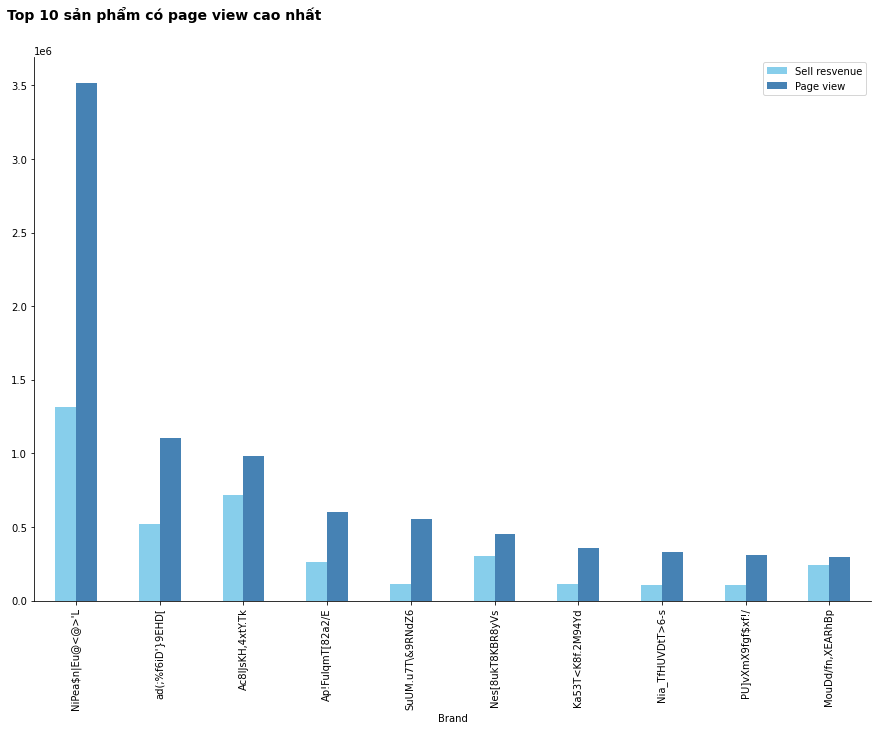

In [23]:
fig, ax = plt.subplots(facecolor='w')
items_res_view.plot(x='Brand', y=['SellPrice', 'pageviews'], kind='bar',ax=ax ,figsize=(15,10),color=['skyblue','steelblue'], label=['Sell resvenue','Page view'])

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.suptitle('Top 10 sản phẩm có page view cao nhất', fontweight='bold', size=14, horizontalalignment='left', x=0.1, y =0.95)

In [24]:
items_res_sell = items_res[['Brand','SellPrice','pageviews','sell_rank','view_rank']].head(10)
items_res_sell

,Brand,SellPrice,pageviews,sell_rank,view_rank
0,NiPea$n|Eu@<@>'L,1317712.0,3517393.2,1.0,1.0
1,"Ac8IJsKH,4xtY.Tk",718302.0,981379.0,2.0,4.0
2,ad(;%f6iD'}9EHD[,519038.0,1103954.0,3.0,2.0
3,"muy(D#""d02`vwt_^",353514.0,120811.0,4.0,32.0
4,Nes[8ukT8KBR8yVs,302239.0,455534.8,5.0,8.0
5,"Jo?$J}r__x007f_""0#/!m:",290526.0,225376.8,6.0,16.0
6,Ap!FulqmT[82a2/E,258897.0,603145.2,7.0,5.0
7,Exa~e4sZi*|fpD<^,248695.0,62935.6,8.0,78.0
8,Al_w1b7Rgo1[d5(t,247433.0,142500.6,9.0,26.0
9,"MouDd/fn,XEARhBp",238473.0,297633.0,10.0,12.0


<AxesSubplot:xlabel='Brand'>

Text(0.1, 0.95, 'Top 10 sản phẩm có doanh thu bán cao nhất')

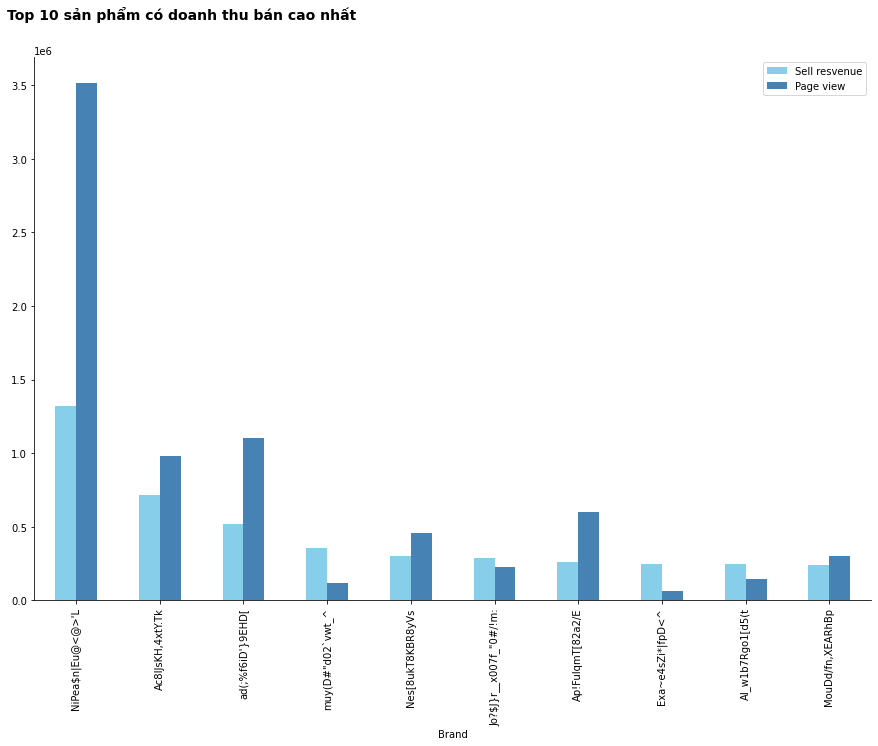

In [25]:
fig, ax = plt.subplots(facecolor='w')
items_res_sell.plot(x='Brand', y=['SellPrice', 'pageviews'], kind='bar',ax=ax ,figsize=(15,10),color=['skyblue','steelblue'], label=['Sell resvenue','Page view'])

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.suptitle('Top 10 sản phẩm có doanh thu bán cao nhất', fontweight='bold', size=14, horizontalalignment='left', x=0.1, y =0.95)

In [26]:
items_res.loc[items_res['pageviews'].isnull() == True]

,Brand,SellPrice,sell_rank,pageviews,uniquePageviews,view_rank
137,NO{m]9Jt1{r_x007f_Hr@E,22158.0,138.0,NaN,NaN,NaN
146,Ap8r`F[}sfP_x007f_->SZ,21023.0,147.0,NaN,NaN,NaN
168,Co$mc>0I_x007f_B/4/.-q,18290.0,169.0,NaN,NaN,NaN
181,To?fI_x007f_Gx]v`FD0Pv,16817.0,182.0,NaN,NaN,NaN
332,SX):-X_x007f_otL7qN.xH,9910.0,333.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2763,LasGkd_x007f_9CO6(|rzX,246.0,2763.0,NaN,NaN,NaN
2773,KO_x007f_7)Qo{U):'RIfN,213.0,2774.0,NaN,NaN,NaN
2775,Nii9Iyw916k_x007f_RoqH,204.0,2776.0,NaN,NaN,NaN
2778,PeIDEX+JTZ~e+_x007f_Y#,182.0,2778.5,NaN,NaN,NaN


In [27]:
items_res.isnull().sum()

Brand                0
SellPrice            0
sell_rank            0
pageviews          212
uniquePageviews    212
view_rank          212
dtype: int64

# 3. Có những phân khúc khách hàng nào? 

In [28]:
data = customer_transactions.merge(customer_data,how='inner',left_on='CustomerID', right_on='ID').merge(items_data,how='inner',left_on='ItemID', right_on='ItemID')
data.drop('ID', inplace=True, axis=1)
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358.0,769.0,15836.0,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197.0,146.0
25209,8359.0,769.0,5847.0,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833.0,280.0
25210,8362.0,769.0,8727.0,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205.0,66.0
25211,8362.0,769.0,13065.0,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012.0,272.0


In [29]:
cus_data = data.groupby(['CustomerID','FirstName', 'LastName','Country','Birthday','DateJoined','Newsletter','Gender']).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()
cus_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0
...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0


In [30]:
from datetime import date

today = date.today()

# tính tuổi
cus_data['Age'] = range(len(cus_data['Birthday']))
for i in range(len(cus_data['Birthday'])):
    cus_data['Age'][i] = today.year - cus_data['Birthday'][i].year

# tính số năm trở thành thành viên
cus_data['Loyalty'] = range(len(cus_data['DateJoined']))
for i in range(len(cus_data['DateJoined'])):
    cus_data['Loyalty'][i] = today.year - cus_data['DateJoined'][i].year

cus_data

C:\Users\hieudd\AppData\Local\Temp\ipykernel_38520\156353322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Age'][i] = today.year - cus_data['Birthday'][i].year
C:\Users\hieudd\AppData\Local\Temp\ipykernel_38520\156353322.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Loyalty'][i] = today.year - cus_data['DateJoined'][i].year


,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,13,7
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,32,7
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,48,7
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,41,7
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0,43,7
...,...,...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0,27,7
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0,33,6
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0,42,6
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0,42,6


In [31]:
list(set(cus_data['Country']))
list(set(cus_data['Newsletter']))
list(set(cus_data['Gender']))
list(set(cus_data['Loyalty']))
print(list(set(cus_data['Age'])))

['GER - Germany', 'IT - Italy', 'FR - France', 'UK - United Kingdom']

['N', 'Y']

['M', 'F']

[6, 7]

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [32]:
list(set(cus_data['Country']))
cus_data.groupby(['Country','Gender'])['Country'].count()

['GER - Germany', 'IT - Italy', 'FR - France', 'UK - United Kingdom']

Country              Gender
FR - France          F          91
                     M          76
GER - Germany        F         107
                     M         112
IT - Italy           F          42
                     M          47
UK - United Kingdom  F          22
                     M          22
Name: Country, dtype: int64

count    519.000000
mean      34.131021
std       13.385370
min       12.000000
25%       23.000000
50%       33.000000
75%       45.000000
max       57.000000
Name: Age, dtype: float64

Country              Gender
FR - France          F         34.593407
                     M         33.526316
GER - Germany        F         35.981308
                     M         32.035714
IT - Italy           F         37.333333
                     M         32.872340
UK - United Kingdom  F         35.363636
                     M         31.318182
Name: Age, dtype: float64

<AxesSubplot:ylabel='Age'>

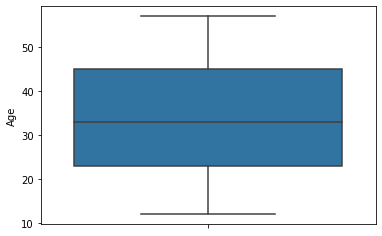

In [33]:
cus_data['Age'].describe()
cus_data.groupby(['Country','Gender'])['Age'].mean()
sns.boxplot(y= cus_data['Age'])

count      519.000000
mean     26384.572254
std      13474.076233
min        745.000000
25%      14790.000000
50%      25849.000000
75%      36926.000000
max      55717.000000
Name: total_expenditures, dtype: float64

Country              Gender
FR - France          F         2467911.0
                     M         1837001.0
GER - Germany        F         2761872.0
                     M         3050873.0
IT - Italy           F         1116612.0
                     M         1215857.0
UK - United Kingdom  F          629132.0
                     M          614335.0
Name: total_expenditures, dtype: float64

<AxesSubplot:ylabel='total_expenditures'>

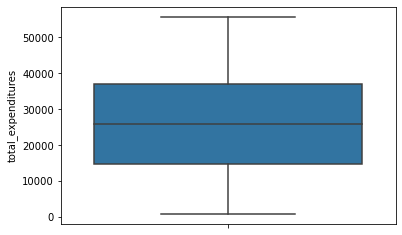

In [34]:
cus_data['total_expenditures'].describe()
cus_data.groupby(['Country','Gender'])['total_expenditures'].sum()
sns.boxplot(y= cus_data['total_expenditures'])

- Có thể thấy những biến Age, Country và Gender có ảnh hưởng đến tổng chỉ tiêu của khách hàng. 
    + Khách hàng đến từ Đức nhiều hơn các nước khác, và khách nam nhiều hơn. Khách hàng đến từ Mỹ ít nhất và khách hàng nam nữ như nhau.
    + Độ tuổi trung bình giữa các nước, giữa nam và nữ chênh lệch không lớn (5 năm), độ tuổi trung bình trong tầm 3x
    + Tổng chi tiêu giữa các nước và giữa nam nữ có sự chênh lệch.
- Các biến Country, Age, Gender, total_expenditures sẽ được sử dụng để xây dựng model

In [35]:
cus_data['Country_data'] = cus_data['Country'].replace(['UK - United Kingdom','FR - France','IT - Italy','GER - Germany'],[1,2,3,4])
cus_data['Gender_data'] = cus_data['Gender'].replace(['M','F'],[1,2])
cus_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,13,7,4,1
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,32,7,2,2
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,48,7,1,1
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,41,7,3,1
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0,43,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0,27,7,1,1
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0,33,6,4,2
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0,42,6,4,1
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0,42,6,4,1


#### Phân loại khách hàng theo độ tuổi
    - Nhóm 1: 12-23: Nhóm trẻ
    - Nhóm 2: 23-33: Nhóm thanh niên
    - Nhóm 3: 33-45: Nhóm trung niên 
    - Nhóm 4: 45-57: Nhóm trung niên 2

#### Phân loại khách hàng theo chi tiêu
    - Nhóm 1: 745-14790: tiêu dùng ít
    - Nhóm 2: 14790-25849: tiêu dùng trung bình
    - Nhóm 3: 25849-36926: tiêu dùng thường
    - Nhóm 4: 36926-55717: tiêu dùng nhiều

In [36]:
conditions = [
        (cus_data['Age'] > 12) & (cus_data['Age'] <= 23),
        (cus_data['Age'] > 23) & (cus_data['Age'] <= 33),
        (cus_data['Age'] > 33) & (cus_data['Age'] <= 45),
        (cus_data['Age'] > 45) & (cus_data['Age'] <= 57)
        ]

values = [1, 2, 3, 4]
cus_data['Age_data'] = np.select(conditions, values)

conditions = [
    (cus_data['total_expenditures'] > 745) & (cus_data['total_expenditures'] <= 14790),
    (cus_data['total_expenditures'] > 14790) & (cus_data['total_expenditures'] <= 25849),
    (cus_data['total_expenditures'] > 25849) & (cus_data['total_expenditures'] <= 36926),
    (cus_data['total_expenditures'] > 36926) & (cus_data['total_expenditures'] <= 55717)
    ]
    
values = [1, 2, 3, 4]
cus_data['total_expen_data'] = np.select(conditions, values)

cus_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data,Age_data,total_expen_data
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,13,7,4,1,1,3
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,32,7,2,2,2,2
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,48,7,1,1,4,1
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,41,7,3,1,3,4
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0,43,7,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,764.0,Yuni0.412862497006326,C0.00700087328826338,UK - United Kingdom,1995-04-02,2015-05-25,Y,M,5205.0,27,7,1,1,2,1
515,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,F,29538.0,33,6,4,2,2,3
516,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,M,45470.0,42,6,4,1,3,4
517,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,M,35462.0,42,6,4,1,3,3


In [37]:
df = cus_data[['Country_data','Gender_data','Age_data','total_expen_data']]
df

,Country_data,Gender_data,Age_data,total_expen_data
0,4,1,1,3
1,2,2,2,2
2,1,1,4,1
3,3,1,3,4
4,4,2,3,3
...,...,...,...,...
514,1,1,2,1
515,4,2,2,3
516,4,1,3,4
517,4,1,3,3


## Build Model Clustering

In [38]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### elbow test

In [39]:
kmeans = KMeans(init='random',n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(df)

KMeans(init='random', n_clusters=3, random_state=42)

In [40]:
kmeans_kwargs = {'init': 'random','n_init': 10,'max_iter': 300,'random_state': 42}
  
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

d:\anacoda\envs\vscode\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(init='random', n_clusters=1, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=3, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=5, random_state=42)

KMeans(init='random', n_clusters=6, random_state=42)

KMeans(init='random', n_clusters=7, random_state=42)

KMeans(init='random', random_state=42)

KMeans(init='random', n_clusters=9, random_state=42)

KMeans(init='random', n_clusters=10, random_state=42)

([<matplotlib.axis.XTick at 0x1ba1ff78d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

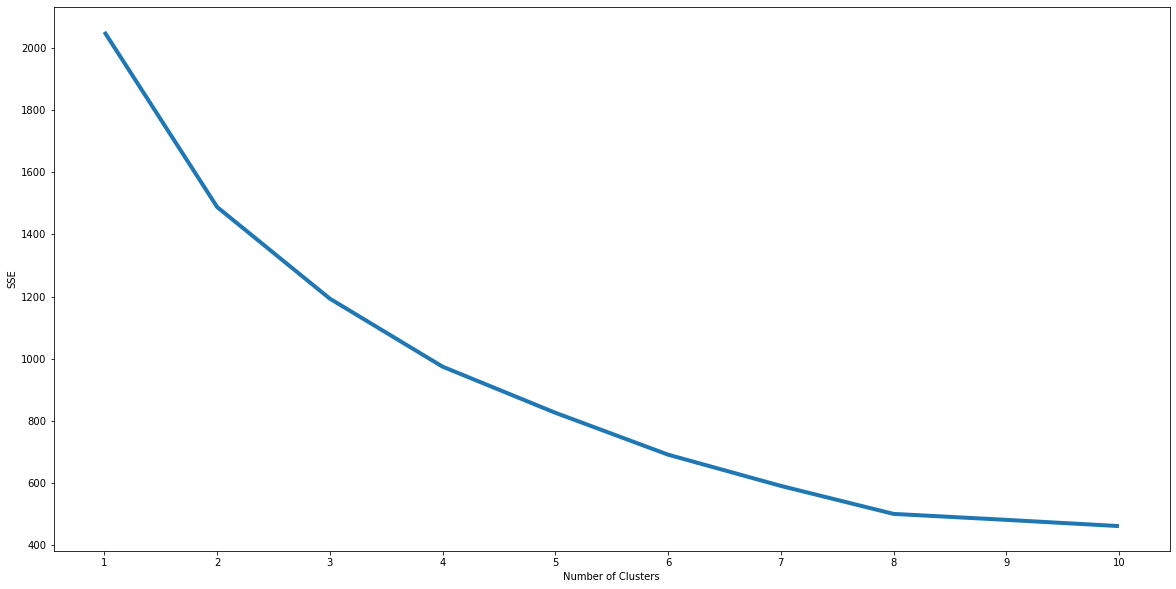

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('w')

plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [42]:
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
kl.elbow

4

=> Có 4 clusters, như vậy có 4 phân khúc khách hàng

### Chạy model với k=4

In [43]:
nclusters = 4
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(df)

In [44]:
df['Cluster Labels'] = kmeans.labels_
df

C:\Users\hieudd\AppData\Local\Temp\ipykernel_38520\3511329709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Labels'] = kmeans.labels_


,Country_data,Gender_data,Age_data,total_expen_data,Cluster Labels
0,4,1,1,3,2
1,2,2,2,2,1
2,1,1,4,1,3
3,3,1,3,4,0
4,4,2,3,3,0
...,...,...,...,...,...
514,1,1,2,1,1
515,4,2,2,3,2
516,4,1,3,4,0
517,4,1,3,3,0


In [45]:
cus_data['Cluster Labels'] = kmeans.labels_

In [46]:
cus_data['Cluster Labels'].value_counts()

0    140
2    136
3    123
1    120
Name: Cluster Labels, dtype: int64

In [47]:
# Phân khúc 1
cluster_1 = cus_data[cus_data["Cluster Labels"] == 0]
cluster_1.head(10)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data,Age_data,total_expen_data,Cluster Labels
3,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,M,37029.0,41,7,3,1,3,4,0
4,5.0,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,1979-03-27,2015-12-23,Y,F,36913.0,43,7,4,2,3,3,0
5,6.0,Ad0.410135716954602,Tan0.662463855720801,GER - Germany,1984-06-01,2015-12-23,N,M,26459.0,38,7,4,1,3,3,0
8,10.0,Bill0.944762168333042,W0.775201627445077,GER - Germany,1981-06-16,2016-01-04,N,F,41584.0,41,6,4,2,3,4,0
13,17.0,Dexte0.0561354795233142,Ang0.128149197304773,GER - Germany,1968-01-19,2016-01-07,N,F,39429.0,54,6,4,2,4,4,0
16,21.0,Ca0.719485458346245,Almad0.854027018192807,IT - Italy,1979-05-26,2016-01-11,N,M,29489.0,43,6,3,1,3,3,0
17,22.0,J0.160054546803774,T0.0848899490958283,FR - France,1966-08-19,2016-01-11,N,F,37959.0,56,6,2,2,4,4,0
23,33.0,Jeann0.794383676954074,M0.959004485316025,GER - Germany,1970-11-25,2016-01-18,N,M,40760.0,52,6,4,1,4,4,0
24,34.0,Je0.105210644555706,Ang0.128149197304773,IT - Italy,1981-06-05,2016-01-18,Y,M,28414.0,41,6,3,1,3,3,0
30,41.0,Siv0.0761083034208156,Man0.831813401609777,GER - Germany,1968-10-10,2015-04-02,N,F,40518.0,54,7,4,2,4,4,0


In [48]:
# Phân khúc 2
cluster_2 = cus_data[cus_data["Cluster Labels"] == 1]
cluster_2.head(10)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data,Age_data,total_expen_data,Cluster Labels
1,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,F,17879.0,32,7,2,2,2,2,1
7,8.0,S0.892783416837388,WEN0.271074390106408,FR - France,1991-02-28,2015-12-28,Y,M,23187.0,31,7,2,1,2,2,1
14,18.0,P0.323209269965169,H0.775911313433166,UK - United Kingdom,2006-02-16,2016-01-07,N,F,11476.0,16,6,1,2,1,1,1
15,20.0,Sya0.305093914468503,Noo0.747896487965337,FR - France,1991-04-19,2016-01-08,N,F,35374.0,31,6,2,2,2,3,1
19,25.0,Chri0.262792235981156,Lol0.823007374919268,UK - United Kingdom,2001-06-07,2016-01-12,Y,M,16969.0,21,6,1,1,1,2,1
20,29.0,Uma0.992924442326397,Harj0.392705673735006,UK - United Kingdom,1979-11-04,2016-01-14,Y,F,41074.0,43,6,1,2,3,4,1
22,32.0,S0.280194605314208,Jusm0.413899149274186,UK - United Kingdom,2000-11-02,2016-01-15,Y,F,48111.0,22,6,1,2,1,4,1
25,35.0,J0.568914585823142,Lo0.652499758514574,UK - United Kingdom,1991-06-11,2016-01-18,N,M,17151.0,31,6,1,1,2,2,1
32,44.0,Moh0.478682882191102,Zulhi0.382724805455352,FR - France,2003-01-11,2016-01-22,N,F,29296.0,19,6,2,2,1,3,1
43,60.0,TR0.21733997017155,t0.000302558074858461,UK - United Kingdom,1996-01-21,2016-02-04,Y,F,32498.0,26,6,1,2,2,3,1


In [49]:
# Phân khúc 3
cluster_3 = cus_data[cus_data["Cluster Labels"] == 2]
cluster_3.head(10)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data,Age_data,total_expen_data,Cluster Labels
0,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,M,34948.0,13,7,4,1,1,3,2
10,13.0,Li0.816138101924376,C0.844976286057262,IT - Italy,2003-03-16,2016-01-05,N,F,15876.0,19,6,3,2,1,2,2
11,14.0,Ana0.456234761724834,Muan0.860501018032884,IT - Italy,2006-10-25,2016-01-05,N,M,9055.0,16,6,3,1,1,1,2
12,15.0,Wang0.848812851699671,Ruig0.58432545739683,GER - Germany,1997-11-24,2016-01-06,Y,F,24647.0,25,6,4,2,2,2,2
18,23.0,Ph0.0566166027444911,He0.271009728221944,IT - Italy,2000-02-07,2016-01-12,N,F,37879.0,22,6,3,2,1,4,2
21,31.0,R0.823815446998847,Cadan0.32944247783917,IT - Italy,2010-04-15,2016-01-15,Y,M,14932.0,12,6,3,1,0,2,2
29,39.0,Suja0.633538618469602,Su0.437591733942547,GER - Germany,2004-08-17,2016-01-20,Y,M,27418.0,18,6,4,1,1,3,2
31,43.0,Jann0.718621382110817,De G0.552809006474718,IT - Italy,2006-12-20,2015-04-06,N,F,52170.0,16,7,3,2,1,4,2
34,46.0,Sy0.621039016393197,Nass0.310156214713561,GER - Germany,1991-05-25,2015-04-06,N,F,10791.0,31,7,4,2,2,1,2
35,47.0,Lee0.643852186379299,Chen0.632615248572152,GER - Germany,1989-09-26,2016-01-25,N,M,9781.0,33,6,4,1,2,1,2


In [50]:
# Phân khúc 4
cluster_4 = cus_data[cus_data["Cluster Labels"] == 3]
cluster_4.head(10)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Gender,total_expenditures,Age,Loyalty,Country_data,Gender_data,Age_data,total_expen_data,Cluster Labels
2,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,M,14603.0,48,7,1,1,4,1,3
6,7.0,Ev0.291189764697797,Kh0.766529502176661,GER - Germany,1970-11-12,2015-12-24,Y,F,13925.0,52,7,4,2,4,1,3
9,11.0,N0.584326642863632,Sy0.115997440873676,IT - Italy,1987-10-20,2015-04-01,N,F,17901.0,35,7,3,2,3,2,3
26,36.0,V V0.144850128832147,Arulj0.461147531160988,GER - Germany,1983-04-23,2016-01-18,Y,F,14791.0,39,6,4,2,3,2,3
27,37.0,Ce0.204374208618756,A0.00175051415988614,IT - Italy,1970-08-18,2016-01-19,N,F,21915.0,52,6,3,2,4,2,3
28,38.0,L0.92453871269312,Li0.607767472650944,GER - Germany,1970-06-20,2015-04-02,N,F,20115.0,52,7,4,2,4,2,3
33,45.0,Oma0.229040869332894,Abd 0.50366098110848,FR - France,1980-05-03,2016-01-22,Y,M,11258.0,42,6,2,1,3,1,3
37,49.0,Hazi0.38562260627276,Zau0.0230941974009324,FR - France,1967-01-12,2016-01-27,Y,M,25260.0,55,6,2,1,4,2,3
39,53.0,Ferd0.840392903639958,V0.115545090187464,IT - Italy,1966-05-07,2015-04-06,N,F,20733.0,56,7,3,2,4,2,3
40,54.0,R0.644598442748862,Daba0.657874713650058,IT - Italy,1972-06-04,2015-04-06,Y,F,20633.0,50,7,3,2,4,2,3


cmap=plt.hot()

C:\Users\hieudd\AppData\Local\Temp\ipykernel_38520\3751818523.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img)


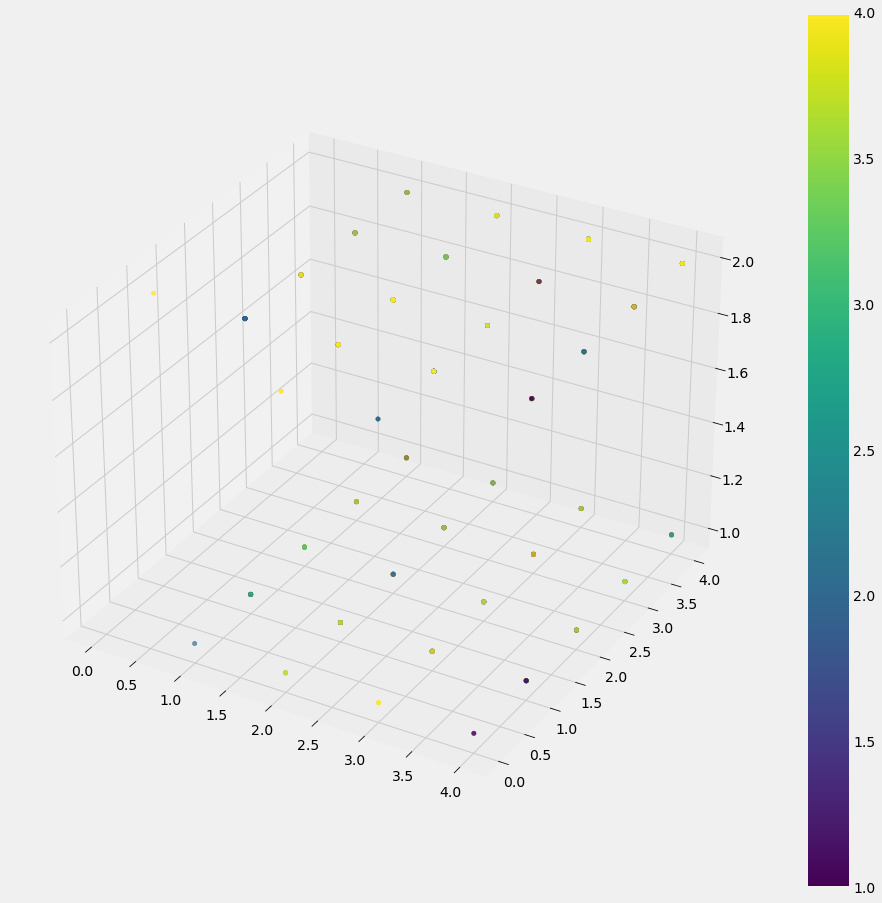

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = cus_data['total_expen_data']
y = cus_data['Age_data']
z = cus_data['Gender_data']
c = cus_data['Country_data']

img = ax.scatter(x, y, z, c=c)
fig.colorbar(img)
plt.show()


#### Phân khúc khách hàng:
    - Phân khúc 1:
        + Khách hàng chủ yếu đến từ Đức
        + Chủ yếu là nam giới
        + Khách hàng đa phần thuộc nhóm trung niên thuộc 2 nhóm tuổi (33-45),(45-57)
        + Là nhóm khách hàng tiêu dùng nhiều nhất.
    
    - Phân khúc 2: 
        + Khách hàng đến từ Pháp và Mỹ
        + Chủ yếu là Nữ giới
        + Khách hàng thuộc nhóm khách hàng trẻ và trưởng thảnh
        + Mức độ tiêu dùng của nhóm khách hàng này rất đa dạng, khách hàng thuộc nhóm trẻ và trưởng thành tiêu dùng nhiều nhất.
    
    - Phân khúc 3: 
        + Khách hàng đến từ Đức và Ý, chủ yếu đến từ Đức
        + Chủ yếu là Nam giới
        + Khách hàng thuộc nhóm khách hàng trẻ
        + Mức độ tiêu dùng của nhóm khách hàng ở mức bình thường.

    - Phân khúc 4: 
        + Khách hàng đến từ 4 nước, chủ yếu đến từ Đức và Pháp
        + Chủ yếu là Nữ giới
        + Khách hàng thuộc nhóm khách hàng trung niên
        + Mức độ tiêu dùng của nhóm khách hàng ở mức thấp.        
    